In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('insurance.csv')


df.head()




,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [3]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
print(df.duplicated().sum())
print(df['sex'].unique())
print(df['age'].unique())
print(df['children'].unique())
print(df['smoker'].unique())
print(df['region'].unique())
df.nunique()

1
['female' 'male']
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
[0 1 3 2 5 4]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [5]:
print(df['charges'].min())
print(df['charges'].max())

1121.8739
63770.42801


In [6]:
print(df['bmi'].min())
print(df['bmi'].max())


15.96
53.13


Text(0.5, 0, 'sex\nfemale    30.377749\nmale      30.943129\nName: bmi, dtype: float64')

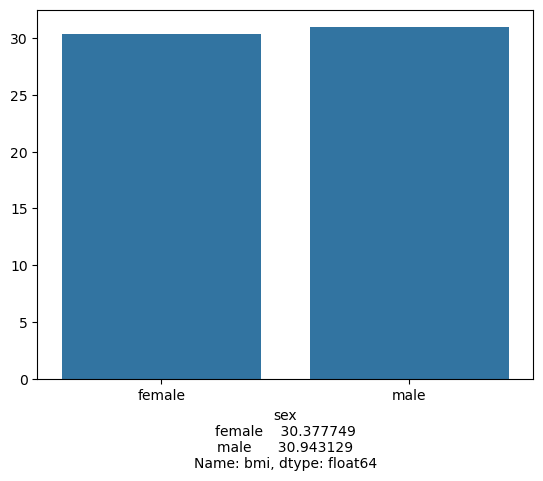

In [7]:
sns.barplot(x=df['bmi'].groupby(df['sex']).mean().index, y=df['bmi'].groupby(df['sex']).mean().values)
plt.xlabel(f'{df['bmi'].groupby(df['sex']).mean()}')


Text(0.5, 0, 'sex\nfemale    12569.578844\nmale      13956.751178\nName: charges, dtype: float64')

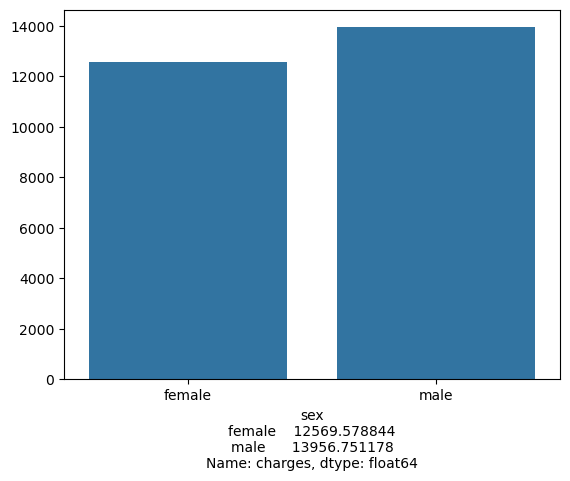

In [8]:
sns.barplot(x=df['charges'].groupby(df['sex']).mean().index, y=df['charges'].groupby(df['sex']).mean().values)
plt.xlabel(f'{df['charges'].groupby(df['sex']).mean()}')

In [9]:
print(df['age'].min())
print(df['age'].max())
df['age_group'] = df['age'].apply(lambda x: '18-25' if x <= 25 else ('26-35' if x <= 35 else ('36-45' if x <= 45 else ('46-55' if x <= 55 else('56-65' if x <= 65 else '66+')))))
df.head()


18
64


,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-25
1,18,male,33.770,1,no,southeast,1725.55230,18-25
2,28,male,33.000,3,no,southeast,4449.46200,26-35
3,33,male,22.705,0,no,northwest,21984.47061,26-35
4,32,male,28.880,0,no,northwest,3866.85520,26-35


In [10]:

df['bmi_group'] = df['bmi'].apply(lambda x: 'low' if x <= 18.5 else ('normal' if x <= 24.9 else ('high' if x <= 29.9 else ('obesity I' if x <= 34.9 else('obesity II' if x <= 39.9 else 'obesity III')))))
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-25,high
1,18,male,33.770,1,no,southeast,1725.55230,18-25,obesity I
2,28,male,33.000,3,no,southeast,4449.46200,26-35,obesity I
3,33,male,22.705,0,no,northwest,21984.47061,26-35,normal
4,32,male,28.880,0,no,northwest,3866.85520,26-35,high


/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_91385/3045800779.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (df.groupby(['sex','bmi_group'])


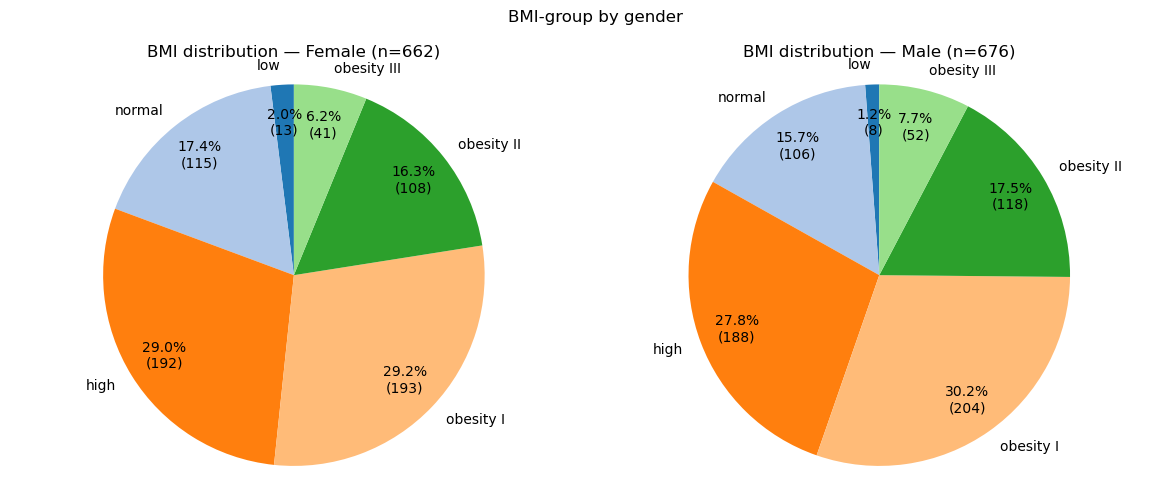

In [11]:
import matplotlib.pyplot as plt

bmi_order = ['low', 'normal', 'high', 'obesity I', 'obesity II', 'obesity III']
df = df.copy()
# Data for the pie chart
df['bmi_group'] = pd.Categorical(df['bmi_group'], ordered=True)

# аккуратные подписи полов
df['sex'] = df['sex'].str.capitalize()  # 'Male' / 'Female'

# сводная таблица: сколько людей в каждой BMI-группе по полу
counts = (df.groupby(['sex','bmi_group'])
            .size()
            .unstack('bmi_group')
            .reindex(columns=bmi_order)
            .fillna(0)
            .astype(int))

# одинаковые цвета для обеих диаграмм
colors = plt.get_cmap('tab20').colors[:len(bmi_order)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, sex in zip(axes, counts.index):
    sizes = counts.loc[sex].values
    total = sizes.sum()
    # подпись: процент + абсолютное количество
    autop = lambda p: f"{p:.1f}%\n({int(round(p*total/100))})"
    ax.pie(sizes, labels=bmi_order, autopct=autop, startangle=90,
           colors=colors, pctdistance=0.8)
    ax.axis('equal')
    ax.set_title(f"BMI distribution — {sex} (n={total})")

plt.suptitle("BMI-group by gender")
plt.tight_layout()
plt.show()


/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_91385/3191182537.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (df.groupby(['smoker','bmi_group'])


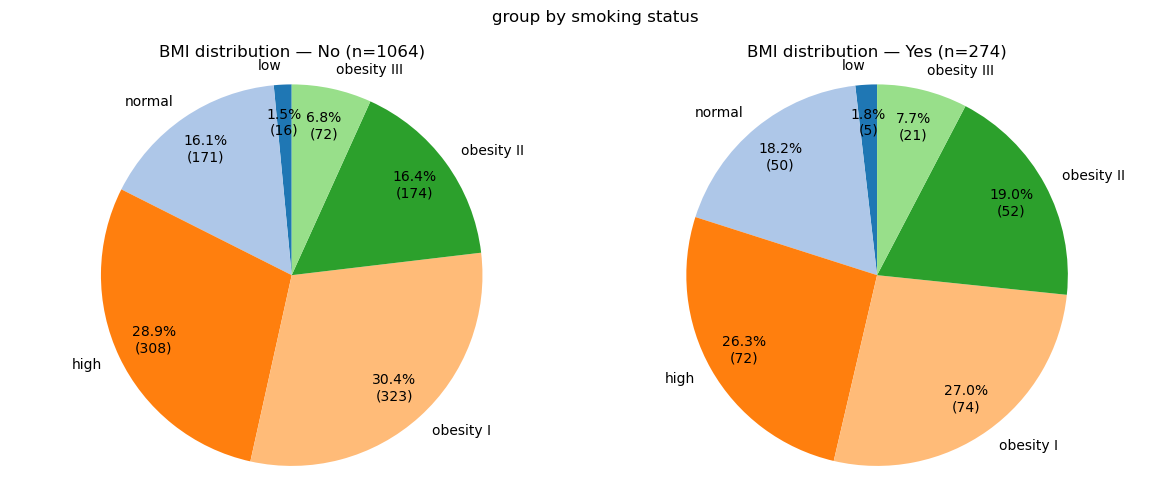

In [12]:
bmi_order = ['low', 'normal', 'high', 'obesity I', 'obesity II', 'obesity III']
df = df.copy()
# Data for the pie chart
df['bmi_group'] = pd.Categorical(df['bmi_group'], ordered=True)

# аккуратные подписи полов
df['smoker'] = df['smoker'].str.capitalize()  # 'Male' / 'Female'

# сводная таблица: сколько людей в каждой BMI-группе по полу
counts = (df.groupby(['smoker','bmi_group'])
            .size()
            .unstack('bmi_group')
            .reindex(columns=bmi_order)
            .fillna(0)
            .astype(int))

# одинаковые цвета для обеих диаграмм
colors = plt.get_cmap('tab20').colors[:len(bmi_order)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, smoker in zip(axes, counts.index):
    sizes = counts.loc[smoker].values
    total = sizes.sum()
    # подпись: процент + абсолютное количество
    autop = lambda p: f"{p:.1f}%\n({int(round(p*total/100))})"
    ax.pie(sizes, labels=bmi_order, autopct=autop, startangle=90,
           colors=colors, pctdistance=0.8)
    ax.axis('equal')
    ax.set_title(f"BMI distribution — {smoker} (n={total})")

plt.suptitle("group by smoking status")
plt.tight_layout()
plt.show()

In [13]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install squarify matplotlib

Note: you may need to restart the kernel to use updated packages.


/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_91385/576761873.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df[df['sex'] == 'Female'].pivot_table(index='age_group', columns='bmi_group', values='charges', aggfunc='mean')


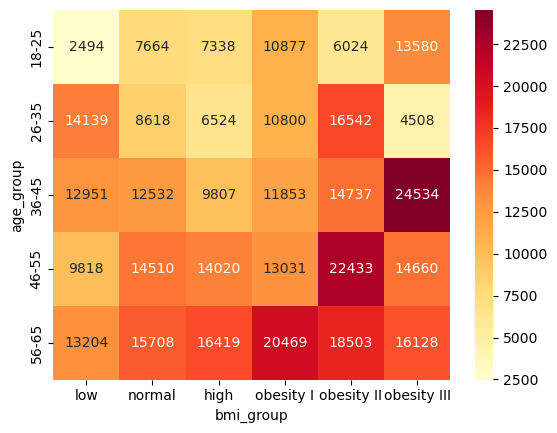

/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_91385/576761873.py:33: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df[df['sex'] == 'Male'].pivot_table(index='age_group', columns='bmi_group', values='charges', aggfunc='mean')


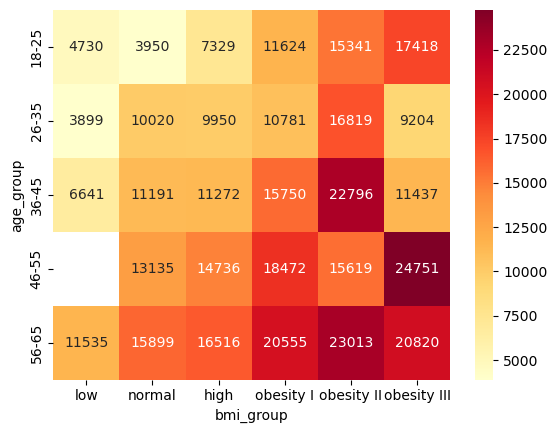

In [15]:
import squarify
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

bmi_order = ['low', 'normal', 'high', 'obesity I', 'obesity II', 'obesity III']
df['bmi_group'] = pd.Categorical(df['bmi_group'], categories=bmi_order, ordered=True)

# (опционально) порядок возрастных групп
age_order = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['age_group'] = pd.Categorical(df['age_group'], categories=age_order, ordered=True)

# 2) Перестраиваем сводную таблицу
pvt = df[df['sex'] == 'Female'].pivot_table(index='age_group', columns='bmi_group', values='charges', aggfunc='mean')

# на случай, если каких-то колонок нет в данных:
pvt = pvt.reindex(index=age_order, columns=[c for c in bmi_order if c in pvt.columns])

# 3) Рисуем heatmap
sns.heatmap(pvt, annot=True, fmt='.0f', cmap='YlOrRd')
plt.xlabel('bmi_group'); plt.ylabel('age_group')
plt.show()


bmi_order = ['low', 'normal', 'high', 'obesity I', 'obesity II', 'obesity III']
df['bmi_group'] = pd.Categorical(df['bmi_group'], categories=bmi_order, ordered=True)

# (опционально) порядок возрастных групп
age_order = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['age_group'] = pd.Categorical(df['age_group'], categories=age_order, ordered=True)

# 2) Перестраиваем сводную таблицу
pvt = df[df['sex'] == 'Male'].pivot_table(index='age_group', columns='bmi_group', values='charges', aggfunc='mean')

# на случай, если каких-то колонок нет в данных:
pvt = pvt.reindex(index=age_order, columns=[c for c in bmi_order if c in pvt.columns])

# 3) Рисуем heatmap
sns.heatmap(pvt, annot=True, fmt='.0f', cmap='YlOrRd')
plt.xlabel('bmi_group'); plt.ylabel('age_group')
plt.show()


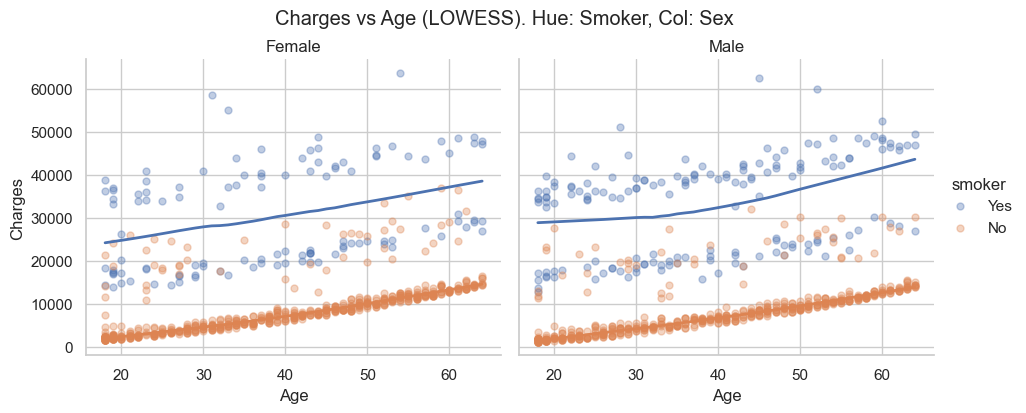

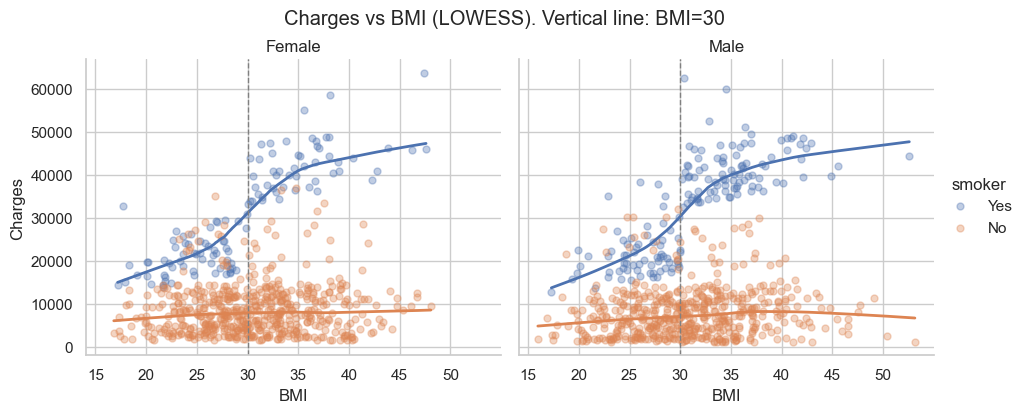

In [16]:
sns.set_theme(style="whitegrid", context="notebook")

df_plot = df.copy()
df_plot['smoker'] = df_plot['smoker'].replace({'yes': 'Smoker', 'no': 'Non-smoker'})
df_plot['sex'] = df_plot['sex'].str.capitalize()  # Male/Female

g = sns.lmplot(
    data=df_plot, x="age", y="charges",
    hue="smoker", col="sex",
    lowess=True, scatter_kws={"alpha":0.35, "s":25}, line_kws={"lw":2},
    height=4, aspect=1.2
)
g.set_axis_labels("Age", "Charges")
g.set_titles(col_template="{col_name}")
plt.suptitle("Charges vs Age (LOWESS). Hue: Smoker, Col: Sex", y=1.03)
plt.show()

g = sns.lmplot(
    data=df_plot, x="bmi", y="charges",
    hue="smoker", col="sex",
    lowess=True, scatter_kws={"alpha":0.35, "s":25}, line_kws={"lw":2},
    height=4, aspect=1.2
)
for ax in g.axes.flat:
    ax.axvline(30, ls="--", lw=1, color="gray")
g.set_axis_labels("BMI", "Charges")
g.set_titles(col_template="{col_name}")
plt.suptitle("Charges vs BMI (LOWESS). Vertical line: BMI=30", y=1.03)
plt.show()

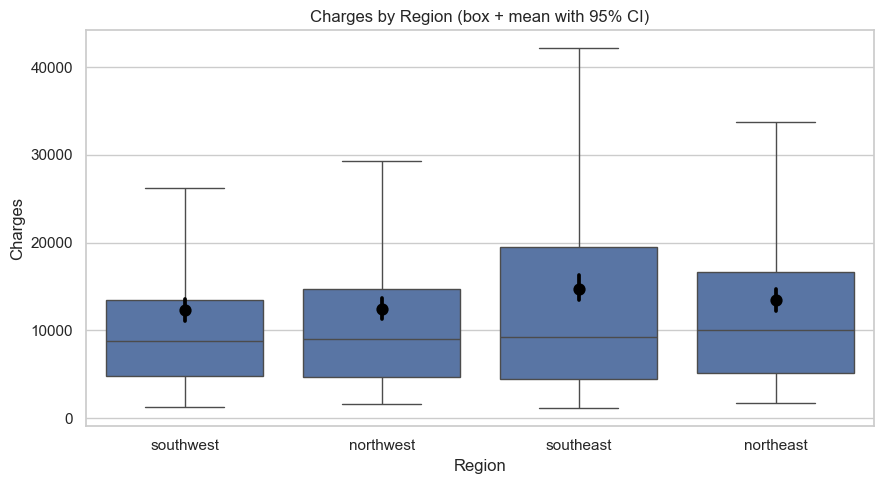

In [17]:
order = (df_plot.groupby("region")["charges"]
         .median().sort_values().index)

plt.figure(figsize=(9,5))
sns.boxplot(data=df_plot, x="region", y="charges", order=order, showfliers=False)
sns.pointplot(
    data=df_plot, x="region", y="charges", order=order,
    estimator=np.mean, errorbar=("ci", 95), linestyles="", color="black"
)
plt.title("Charges by Region (box + mean with 95% CI)")
plt.xlabel("Region"); plt.ylabel("Charges")
plt.tight_layout(); plt.show()

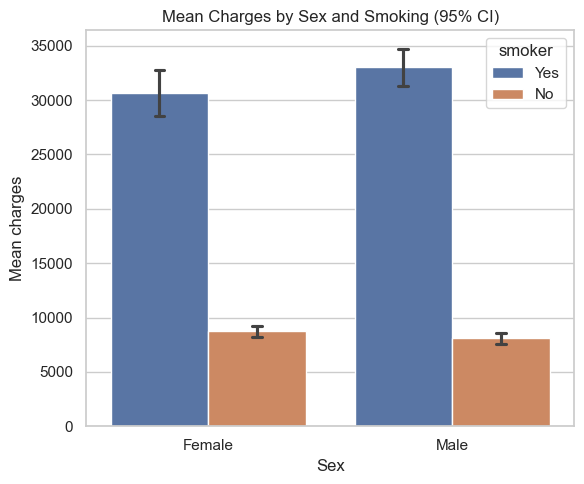

In [18]:
plt.figure(figsize=(6,5))
sns.barplot(
    data=df_plot, x="sex", y="charges", hue="smoker",
    estimator=np.mean, errorbar=("ci", 95), capsize=.08
)
plt.title("Mean Charges by Sex and Smoking (95% CI)")
plt.xlabel("Sex"); plt.ylabel("Mean charges")
plt.tight_layout(); plt.show()

In [19]:
groups = (
    df.groupby(['sex','age_group','bmi_group','smoker'], observed=True)
      .agg(
          n=('charges', 'size'),         # количество в группе (включая NaN)
          mean=('charges', 'mean'),
          min=('charges', 'min'),
          max=('charges', 'max')
      )
      .reset_index()
)

groups.head().sort_values(by='n', ascending=False)

,sex,age_group,bmi_group,smoker,n,mean,min,max
3,Female,18-25,high,No,27,4295.693037,1615.7667,18955.22017
1,Female,18-25,normal,No,24,4938.900108,1607.5101,25081.76784
4,Female,18-25,high,Yes,8,17606.802362,16884.9240,18328.23810
2,Female,18-25,normal,Yes,7,17009.102186,13844.5060,26125.67477
0,Female,18-25,low,No,3,2493.503283,1727.7850,3167.45585
